In [16]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import dataset

In [17]:
a=pd.read_csv('C:/Users/Lenovo/Downloads/Compressed/spam.csv')
a.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
a.shape

(5572, 2)

# check for any null values

In [19]:
a.isna().sum()

Category    0
Message     0
dtype: int64

# check length of each message

In [20]:
a["length"]=a["Message"].apply(len)
a.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
spam = a[a.Category == 'spam']
ham = a[a.Category == 'ham']

In [22]:
spam.describe()

,length
count,747.000000
mean,137.989290
std,29.980287
min,7.000000
25%,132.000000
50%,149.000000
75%,157.000000
max,223.000000


In [23]:
ham.describe()

,length
count,4825.000000
mean,71.448290
std,58.434864
min,2.000000
25%,33.000000
50%,52.000000
75%,93.000000
max,910.000000


# plot

Text(0.5, 1.0, 'Category')

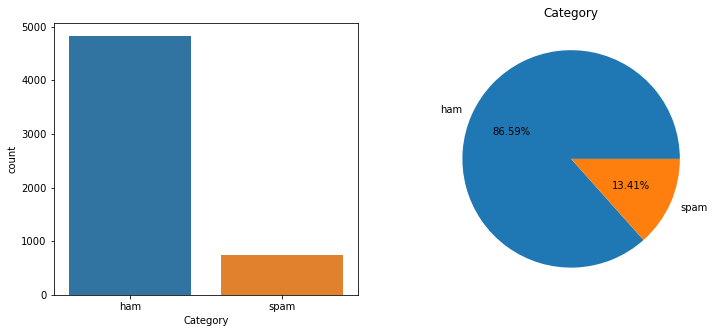

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(a['Category'])
plt.subplot(1,2,2)
plt.pie(a['Category'].value_counts(), labels = ['ham', 'spam'], autopct='%.02f%%')
plt.title('Category')

<AxesSubplot:xlabel='length', ylabel='Count'>

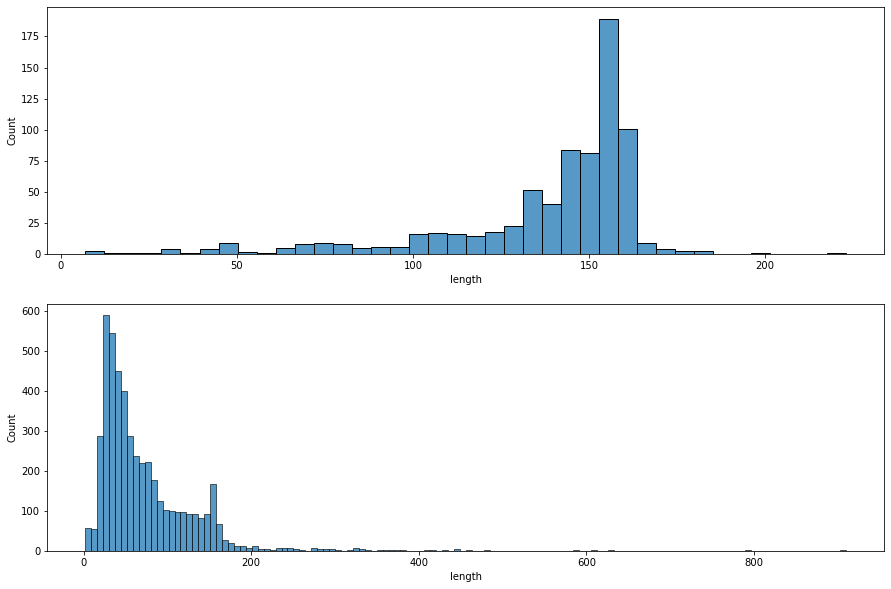

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(spam,  x = 'length')
plt.subplot(2,1,2)
sns.histplot(ham, x = 'length')

In [26]:
a[['Category']] = a[['Category']].replace({'ham':0, 'spam':1})

# import required libraries

In [27]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [28]:
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [29]:
message = []
for i in a.Message:
    message1 = re.sub('[^a-zA-Z0-9]', ' ', i)
    message2 = message1.lower()
    message3 = message2.split(' ')
    message4 = ''
    for j in message3:
        message4 = message4 + ' ' + str(wnl.lemmatize(ps.stem(j))).upper()
    message.append(message4)    

In [30]:
message

[' GO UNTIL JURONG POINT  CRAZI   AVAIL ONLI IN BUGI N GREAT WORLD LA E BUFFET    CINE THERE GOT AMOR WAT   ',
 ' OK LAR    JOKE WIF U ONI   ',
 ' FREE ENTRI IN 2 A WKLI COMP TO WIN FA CUP FINAL TKT 21ST MAY 2005  TEXT FA TO 87121 TO RECEIV ENTRI QUESTION STD TXT RATE T C S APPLI 08452810075OVER18 S',
 ' U DUN SAY SO EARLI HOR    U C ALREADI THEN SAY   ',
 ' NAH I DON T THINK HE GOE TO USF  HE LIVE AROUND HERE THOUGH',
 ' FREEMSG HEY THERE DARL IT S BEEN 3 WEEK S NOW AND NO WORD BACK  I D LIKE SOME FUN YOU UP FOR IT STILL  TB OK  XXX STD CHG TO SEND   1 50 TO RCV',
 ' EVEN MY BROTHER IS NOT LIKE TO SPEAK WITH ME  THEY TREAT ME LIKE AID PATENT ',
 ' A PER YOUR REQUEST  MELL MELL  ORU MINNAMINUNGINT NURUNGU VETTAM   HA BEEN SET A YOUR CALLERTUN FOR ALL CALLER  PRESS  9 TO COPI YOUR FRIEND CALLERTUN',
 ' WINNER   A A VALU NETWORK CUSTOM YOU HAVE BEEN SELECT TO RECEIVEA  900 PRIZE REWARD  TO CLAIM CALL 09061701461  CLAIM CODE KL341  VALID 12 HOUR ONLI ',
 ' HAD YOUR MOBIL 11 MONTH OR MORE 

# CountVectorizer

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(message).toarray()

In [32]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
x.shape

(5572, 7320)

In [34]:
y = a[['Category']]

# train_test_split

In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state= 21)

In [36]:
ytrain.Category.value_counts()

0    3865
1     592
Name: Category, dtype: int64

In [37]:
# to overcome to oversampling of data
from imblearn.over_sampling import SMOTE     
smote = SMOTE(random_state=21)
x1, y1  = smote.fit_resample(xtrain, ytrain)

In [38]:
y1.Category.value_counts()

0    3865
1    3865
Name: Category, dtype: int64

# Models

In [39]:
RS = 25   # random state

from sklearn.model_selection import train_test_split
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x1,y1, test_size=0.2, random_state=RS)

# 1. LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
log_model = logreg.fit(xtrain2,ytrain2)
pred_test = log_model.predict(xtest2)
pred_train = log_model.predict(xtrain2)

from sklearn.metrics import accuracy_score
print('LogisticRegression')
print('training accuracy : ',round(accuracy_score(ytrain2,pred_train),3))
print('testing accuracy : ',round(accuracy_score(ytest2,pred_test),3))
print('--------------------------------------------')

# 2. DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=RS)
dtc_model = dtc.fit(xtrain2,ytrain2)
pred_train = dtc_model.predict(xtrain2)
pred_test = dtc_model.predict(xtest2)

print('DecisionTreeClassifier')
print('training_accuracy: ',round(accuracy_score(ytrain2,pred_train),3))
print('testing_accuracy:  ', round(accuracy_score(ytest2,pred_test),3))
print('----------------------------------------------------')


# 3. RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=RS)
rfc_model = rfc.fit(xtrain2,ytrain2)
pred_train = dtc_model.predict(xtrain2)
pred_test = dtc_model.predict(xtest2)

print('RandomForestClassifier')
print('training_accuracy: ',round(accuracy_score(ytrain2,pred_train),3))
print('testing_accuracy:  ', round(accuracy_score(ytest2,pred_test),3))
print('----------------------------------------------------')


# 4. GaussianNB

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(xtrain2,ytrain2)
pred_train = gnb_model.predict(xtrain2)
pred_test = gnb_model.predict(xtest2)

print('GaussianNB')
print('training_accuracy: ',round(accuracy_score(ytrain2,pred_train),3))
print('testing_accuracy:  ', round(accuracy_score(ytest2,pred_test),3))
print('----------------------------------------------------')


LogisticRegression
training accuracy :  0.991
testing accuracy :  0.941
--------------------------------------------
DecisionTreeClassifier
training_accuracy:  0.999
testing_accuracy:   0.921
----------------------------------------------------
RandomForestClassifier
training_accuracy:  0.999
testing_accuracy:   0.921
----------------------------------------------------
GaussianNB
training_accuracy:  0.959
testing_accuracy:   0.931
----------------------------------------------------


In [40]:
ytrain2.Category.value_counts()

0    3104
1    3080
Name: Category, dtype: int64

In [41]:
ytest2.Category.value_counts()

1    785
0    761
Name: Category, dtype: int64

# confusion_matrix

Text(51.0, 0.5, 'actual')

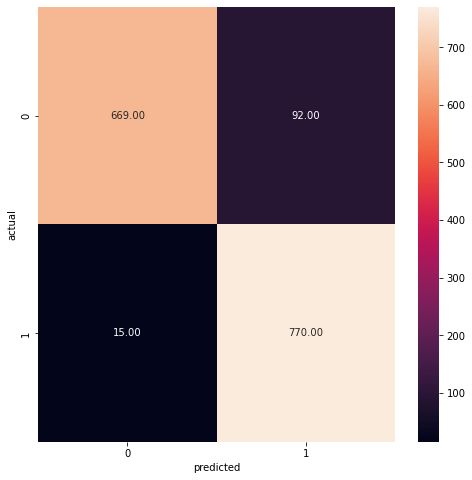

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest2, pred_test)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True , fmt='.2f')

plt.xlabel('predicted')
plt.ylabel('actual')

# keras tuner

In [43]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [44]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(64,activation='relu', input_dim = xtrain2.shape[1]))
    p = hp.Int("units", min_value=64, max_value = 512, step = 32 )
    nn.add(Dense(units = p))
    q = hp.Choice("rate", values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    nn.add(Dropout(rate = q))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn

In [48]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                 objective = 'val_accuracy',
                     max_epochs = 10,
                     directory= 'C:/Users/Lenovo/Downloads/kt4',
                     project_name = 'spam')

In [49]:
es = EarlyStopping(monitor = 'val_loss', patience = 20)

In [50]:
tuner.search(xtrain2, ytrain2, callbacks = [es], epochs = 50, validation_split = 0.2)

Trial 30 Complete [00h 00m 09s]
val_accuracy: 0.9749393463134766

Best val_accuracy So Far: 0.978173017501831
Total elapsed time: 00h 01m 59s
INFO:tensorflow:Oracle triggered exit


In [51]:
tuner.get_best_hyperparameters(num_trials=1)[0].get('units')

416

In [52]:
tuner.get_best_hyperparameters()[0].get("rate")

0.1

In [53]:
nn = Sequential()
nn.add(Dense(64,activation='relu', input_dim = xtrain2.shape[1]))
nn.add(Dropout(0.4))
nn.add(Dense(416, activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(xtrain2, ytrain2, validation_split=0.2, epochs=50)

Epoch 1/50
155/155 [==============================] - 1s 6ms/step - loss: 0.2594 - accuracy: 0.8985 - val_loss: 0.1409 - val_accuracy: 0.9717
Epoch 2/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0478 - accuracy: 0.9887 - val_loss: 0.1261 - val_accuracy: 0.9725
Epoch 3/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0202 - accuracy: 0.9958 - val_loss: 0.1345 - val_accuracy: 0.9741
Epoch 4/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.1528 - val_accuracy: 0.9733
Epoch 5/50
155/155 [==============================] - 1s 8ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.1652 - val_accuracy: 0.9741
Epoch 6/50
155/155 [==============================] - 1s 6ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.1628 - val_accuracy: 0.9766
Epoch 7/50
155/155 [==============================] - 1s 6ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.1765 - val_accuracy: 0.9757
Epoch 

In [56]:
nn_pred = nn.predict_classes(xtest2)
round(accuracy_score(ytest2, nn_pred),4)

0.9709

Text(51.0, 0.5, 'actual')

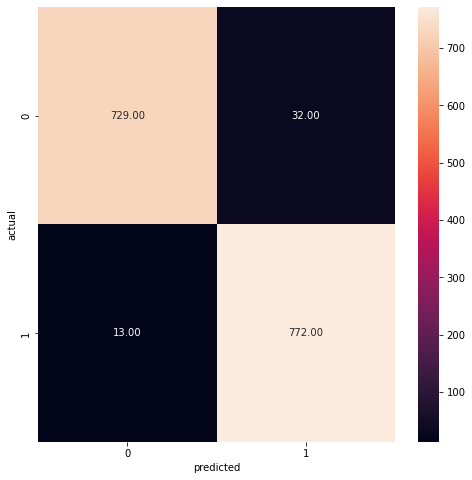

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest2, nn_pred)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True , fmt='.2f')

plt.xlabel('predicted')
plt.ylabel('actual')

In [58]:
ytest2[['Predicted']] = pred
ytest2

,Category,Predicted
2022,0,0
5313,1,1
4445,0,0
7546,1,1
3697,0,0
...,...,...
1790,0,0
3577,0,0
7342,1,1
5649,1,1
